In [1]:
import pandas as pd
import xarray as xr


In [2]:
from pangeo_forge_recipes.patterns import ConcatDim, FilePattern, pattern_from_file_sequence
from pangeo_forge_recipes.recipes import XarrayZarrRecipe,setup_logging


In [3]:
dates = pd.date_range('2009-07-01', '2009-07-10', freq='D')

In [4]:
URL_FORMAT = (
    "https://ige-meom-opendap.univ-grenoble-alpes.fr"
    "/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y{time:%Y}m{time:%m}d{time:%d}.1d_somxl010.nc"
)

In [5]:
input_urls= [ URL_FORMAT.format(time=time) for time in dates ]

In [6]:
pattern = pattern_from_file_sequence(input_urls, "time_counter")

In [7]:
pattern

<FilePattern {'time_counter': 10}>

In [8]:
recipe = XarrayZarrRecipe(pattern, target_chunks={"time_counter": 10,'x':2000,'y':2000})

In [9]:
setup_logging()

In [10]:
run_function = recipe.to_function()

In [11]:
run_function()

pangeo_forge_recipes.recipes.xarray_zarr - INFO - Caching input 'Index({DimIndex(name='time_counter', index=0, sequence_len=10, operation=<CombineOp.CONCAT: 2>)})'
pangeo_forge_recipes.storage - INFO - Caching file 'https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y2009m07d01.1d_somxl010.nc'
pangeo_forge_recipes.storage - INFO - Copying remote file 'https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y2009m07d01.1d_somxl010.nc' to cache
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Opening input with Xarray Index({DimIndex(name='time_counter', index=0, sequence_len=10, operation=<CombineOp.CONCAT: 2>)}): 'https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y2009m07d01.1d_somxl010.nc'
pangeo_forge_recipes.storage - INFO - Opening 'https://ige-meom-opendap.

/srv/conda/envs/notebook/lib/python3.9/site-packages/pangeo_forge_recipes/recipes/xarray_zarr.py:115: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  return xr.open_zarr(target.get_mapper())


pangeo_forge_recipes.recipes.xarray_zarr - INFO - Storing dataset in /tmp/tmph6q49jeu/SP2BoQv7
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Expanding target concat dim 'time_counter' to size 10
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Opening inputs for chunk Index({DimIndex(name='time_counter', index=0, sequence_len=10, operation=<CombineOp.CONCAT: 2>)})
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Opening input with Xarray Index({DimIndex(name='time_counter', index=0, sequence_len=10, operation=<CombineOp.CONCAT: 2>)}): 'https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y2009m07d01.1d_somxl010.nc'
pangeo_forge_recipes.storage - INFO - Opening 'https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/eNATL60/eNATL60-BLBT02/1d/eNATL60-BLBT02_y2009m07d01.1d_somxl010.nc' from cache
pangeo_forge_recipes.recipes.xarray_zarr - INFO - Combining inputs for chunk 'Inde

In [12]:
mld_zarr = xr.open_zarr(recipe.target_mapper, consolidated=True)
mld_zarr

<xarray.Dataset>
Dimensions:       (y: 4729, x: 8354, time_counter: 10)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2009-07-01T12:00:00 ... 2009-...
Dimensions without coordinates: y, x
Data variables:
    nav_lat       (y, x) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(2000, 2000), meta=np.ndarray>
    somxl010      (time_counter, y, x) float32 dask.array<chunksize=(10, 2000, 2000), meta=np.ndarray>
Attributes:
    CASE:              N/A
    CONFIG:            N/A
    output_frequency:  N/A
    start_date:        -1

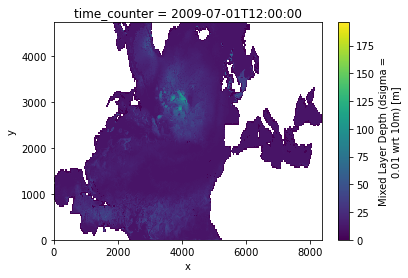

In [13]:
mld_zarr.somxl010[0].plot()